In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# Univariate Statistics

<p class = 'note'>
In univariate statistics, we compute whether there is a statistically significant relation‐
ship between each feature and the target. Then the features that are related with the
highest confidence are selected. In the case of classification, this is also known as
analysis of variance (ANOVA)
<br><br>
To use univariate feature selection in scikit-learn, you need to choose a test, usu‐
ally either f_classif (the default) for classification or f_regression for regression,
and a method to discard features based on the p-values determined in the test. 
</p>

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
#add 4 random columns to the iris dataset
np.random.seed(6)
noise = np.random.normal(size = (len(iris.data), 4))
X, y = np.c_[iris.data, noise], iris.target

In [3]:
from sklearn.feature_selection import SelectPercentile
model = SelectPercentile(percentile = 50) #keep 50% feature
model.fit(X, y)
X_new = model.transform(X)
model.get_support() #get a mask of which feature is chosen (True) and which feature is discarded (Flase)

array([ True,  True,  True,  True, False, False, False, False])

<p class = 'note'>We can see that the above was able to remove noise feature from the iris data set</p>

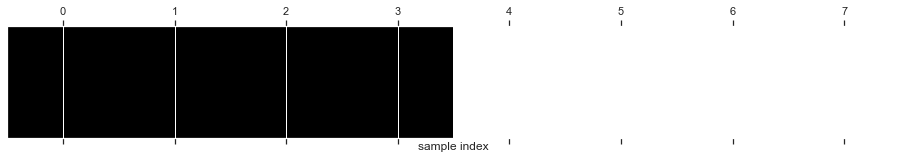

In [4]:
mask = model.get_support()
plt.matshow(mask.reshape((1,-1)), cmap = 'binary')
plt.xlabel('sample index')
plt.gca().yaxis.set_visible(False)


# Model Based Feature selection

<ul class = 'note'>
    <li>Ridge regression: learn sparse coefficients, only use a small subset of data</li>
    <li>DecisionTree.feature_importances_</li>
    <li>Linear models have
coefficients, which can also be used to capture feature importances by considering the
absolute values.</li>
</ul>

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
# SelectFromModel?
#Use the median feature importance score as threshold
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100), threshold = 'median')
selector.fit(X, y)
X_new = selector.transform(X)
selector.get_support()

array([ True,  True,  True,  True, False, False, False, False])

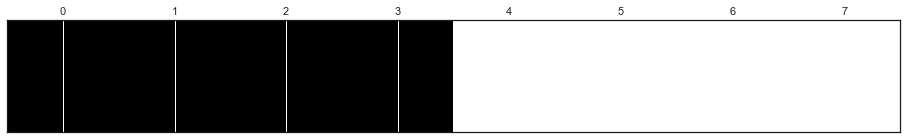

In [6]:
plt.matshow(selector.get_support().reshape((1,-1)), cmap = 'gray_r') #matrix show
plt.grid(True, axis = 'y')
ax = plt.gca()
ax.yaxis.set_visible(False)
ax.tick_params(length = 0)
ax.spines['left'].set_color('k')
ax.spines['right'].set_color('k')
ax.spines['bottom'].set_color('k')
ax.spines['top'].set_color('k')

<h1>Iterative Feature Selection</h1>
In univariate testing we used no model, while in model-based selection we used a sin‐
gle model to select features. In iterative feature selection, a series of models are built,
with varying numbers of features. There are two basic methods: starting with no fea‐
tures and adding features one by one until some stopping criterion is reached, or
starting with all features and removing features one by one until some stopping crite‐
rion is reached. Because a series of models are built, these methods are much more
computationally expensive than the methods we discussed previously. One particular
method of this kind is recursive feature elimination (RFE), which starts with all fea‐
tures, builds a model, and discards the least important feature according to the
model. Then a new model is built using all but the discarded feature, and so on until
only a prespecified number of features are left. For this to work, the model used for
selection needs to provide some way to determine feature importance, as was the case
for the model-based selection. 

In [7]:
from sklearn.feature_selection import RFE
RFE?
selector = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select=4)
selector.fit(X, y)
X_new = selector.transform(X)
selector.get_support()

array([ True,  True,  True,  True, False, False, False, False])

# Utilizing Expert Knowledge

In [8]:
from mglearn.datasets import load_citibike
df = load_citibike()
df.head(10)

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
2015-08-01 15:00:00    27
2015-08-01 18:00:00    12
2015-08-01 21:00:00     4
2015-08-02 00:00:00     3
2015-08-02 03:00:00     4
Freq: 3H, Name: one, dtype: int64

<p class = 'note'>The task we want to solve is to predict for a given time and day
how many people will rent a bike in front of Andreas’s house—so he knows if any
bikes will be left for him.
</p>

C:\Users\dell\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


'OK'

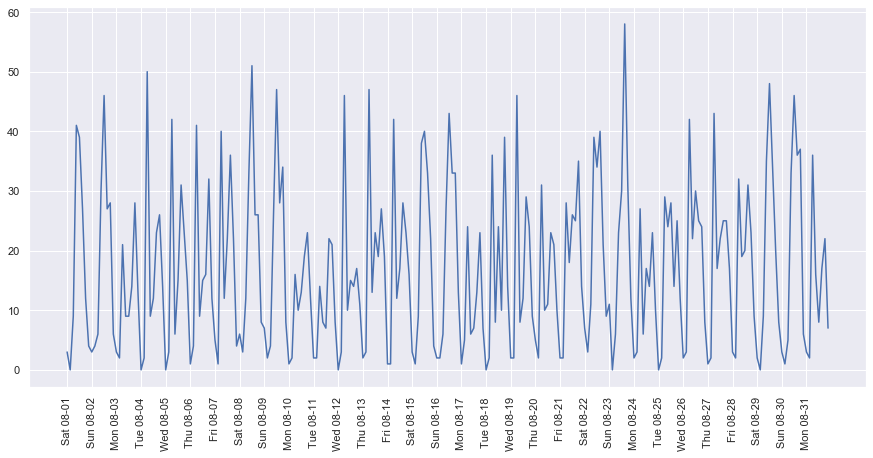

In [9]:
fig = plt.figure(figsize = (15, 7))
ax = plt.gca()
ax.plot(df)
ax.tick_params(axis = 'x', rotation = 90)

ticks = pd.date_range(df.index.min(), df.index.max(), freq = 'D')
ax.set_xticks(ticks)
ax.set_xticklabels(ticks.strftime('%a %m-%d'))


Looking at the data, we can clearly distinguish day and night for each 24 hours interval

In [94]:
def analysis(X, y, model):
    #Split into train set and test set
    train_size = 186
    
#     index, values = df.index.astype(int).to_numpy()[:, None] / 10 ** 11, df.values
    x_train, x_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]
    model.fit(x_train, y_train)
    print('Train score: %.2f' % model.score(x_train, y_train))
    print('Test score: %.2f' % model.score(x_test, y_test))
    fig = plt.figure(figsize = (15, 7))
    ax = plt.subplot()
    ax.plot(df.index[:train_size], model.predict(x_train), label = 'train set prediction', ls = '--', color = 'blue')
    ax.plot(df.index[train_size:], model.predict(x_test), label = 'test set prediction', color = 'teal', ls = '--')
    ax.plot(df.iloc[:train_size], color = 'green', label = 'train set')
    ax.plot(df.iloc[train_size:], color = 'red', label = 'test set')
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks.strftime('%a %d-%m'))
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set(xlabel = 'Date', ylabel = 'Rentals')
    ax.legend(bbox_to_anchor = (0,1,1,1), mode = 'expand', ncol = 2, loc = 'lower left')

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Train score: 0.84
Test score: -0.76


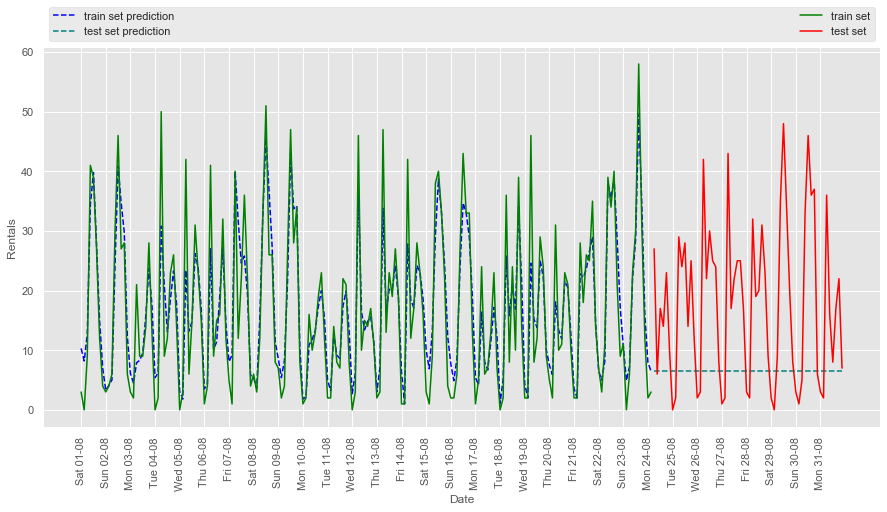

In [95]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 6)
X, y = df.index.astype(int).to_numpy()[:, None] / 10 ** 11, df.values
analysis(X, y, model)


<p class = 'note'>Clearly we can do better than this. This is where our “expert knowledge” comes in.
From looking at the rental figures in the training data, two factors seem to be very
important: the time of day and the day of the week.
</p>

Train score: 0.89
Test score: 0.83


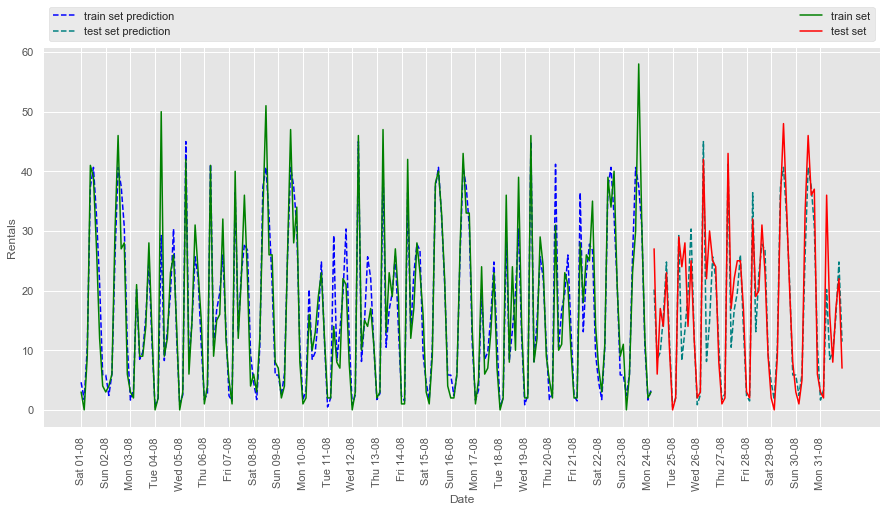

In [100]:
h, m, s = df.index.hour, df.index.minute, df.index.second
tod = h * 3600 + m * 60 + s
dow = df.index.dayofweek
# We can’t really learn anything from the POSIX time, so we drop that feature. 
X1 = np.c_[tod, dow]
analysis(X1, y, model)

<p class = 'note'> This
actually does not require a complex model like a random forest, so let’s try with a
simpler model, LinearRegression </p>

Train score: 0.17
Test score: 0.10


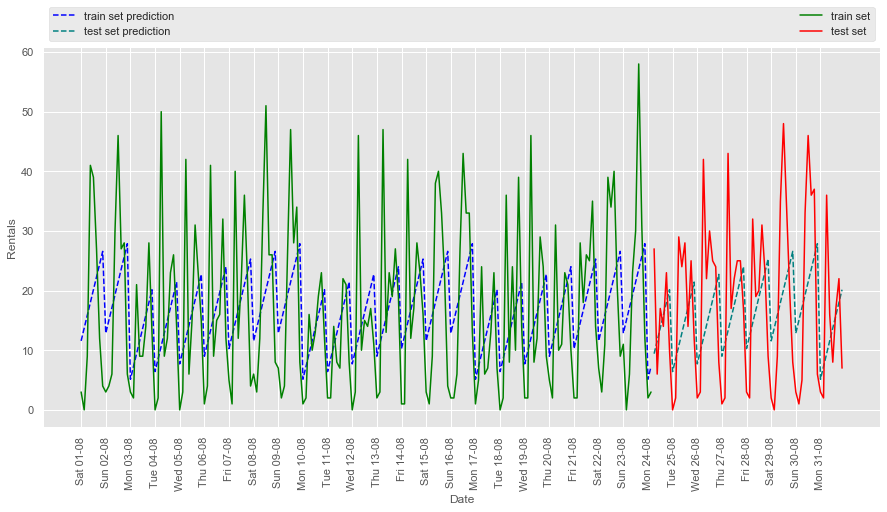

In [101]:
from sklearn.linear_model import LinearRegression
analysis(X1, y, LinearRegression())

LinearRegression works much worse, and the periodic pattern looks odd. The rea‐
son for this is that we encoded day of week and time of day using integers, which are
interpreted as categorical variables.
<p class = 'note'>Solution: One hot coding for catogorical variables</p>

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Train score: 0.54
Test score: 0.61


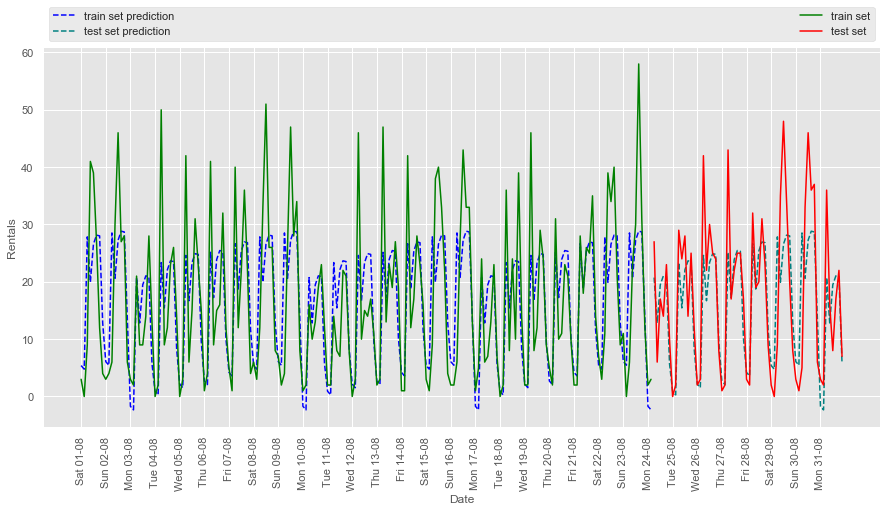

In [102]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
X2 = encoder.fit_transform(X1)
analysis(X2, y, LinearRegression())

<span class = 'warning'>It's much better now</span>

<p class = 'note'>Can we do better than this? <br>
Let add <i>Interaction</i> by using Polynomial features
</p>

Train score: 0.89
Test score: 0.83


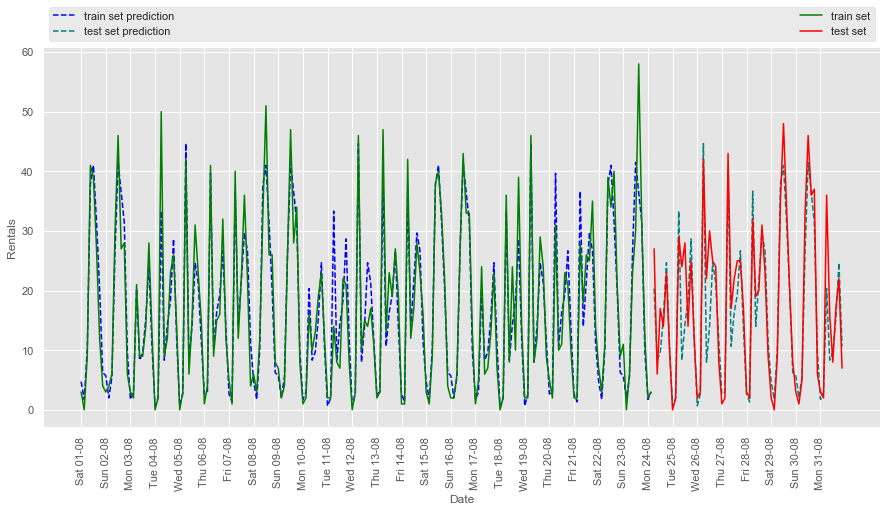

In [108]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
analysis(X2, y, model)